/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4749
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -38687.985
Date:                Sun, 20 Apr 2025   AIC                          77381.971
Time:                        18:01:13   BIC                          77401.367
Sample:                    01-01-2012   HQIC                         77388.787
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6716      0.067    -10.089      0.000      -0.802      -0.541
ma.L1          0.6265      0.070      8.935      0.000       0.489       0.764
sigma2      7.006e+05   4948.358    141.580      0.0

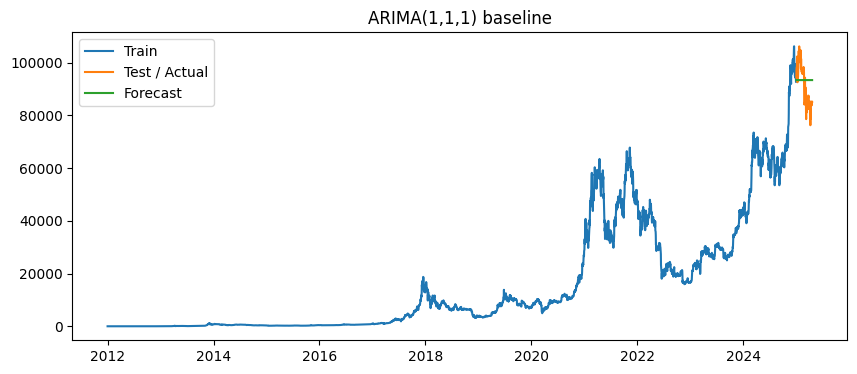

In [11]:
import pandas as pd, pathlib, matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

PROC = pathlib.Path("../data/processed")
btc = pd.read_csv(PROC/"btc_daily.csv", parse_dates=["Date"]).set_index("Date")["Close"]

train = btc.loc[:'2024-12-31']
test  = btc.loc['2025-01-01':]

model = ARIMA(train, order=(1,1,1)).fit()
print(model.summary())

pred  = model.forecast(steps=len(test))
rmse  = np.sqrt(((test - pred) ** 2).mean())
print("Test RMSE =", round(rmse, 2))

plt.figure(figsize=(10,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index,  test,  label="Test / Actual")
plt.plot(test.index,  pred,  label="Forecast")
plt.legend(); plt.title("ARIMA(1,1,1) baseline"); plt.show()


In [ ]:
print(pred.head())
print(pred.tail())
print("Daily change in forecast:", (pred.diff().dropna()).round(2).unique()[:5])



2025-01-01 00:00:00+00:00    93357.603152
2025-01-02 00:00:00+00:00    93373.315362
2025-01-03 00:00:00+00:00    93362.763789
2025-01-04 00:00:00+00:00    93369.849723
2025-01-05 00:00:00+00:00    93365.091147
Freq: D, Name: predicted_mean, dtype: float64
2025-04-16 00:00:00+00:00    93367.002923
2025-04-17 00:00:00+00:00    93367.002923
2025-04-18 00:00:00+00:00    93367.002923
2025-04-19 00:00:00+00:00    93367.002923
2025-04-20 00:00:00+00:00    93367.002923
Freq: D, Name: predicted_mean, dtype: float64
Daily change in forecast: [ 15.71 -10.55   7.09  -4.76   3.2 ]


/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/aanantharajah/crypto-sentiment/

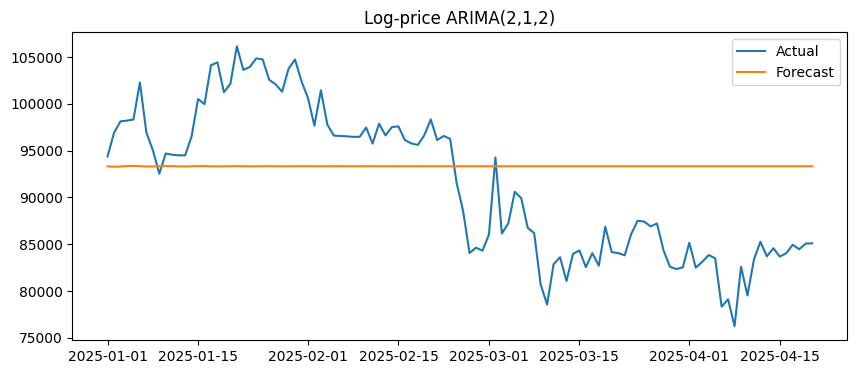

In [14]:
import numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

y_log = np.log(btc)
train = y_log[:'2024-12-31']; test = y_log['2025-01-01':]

model = ARIMA(train, order=(2,1,2)).fit()
pred_log = model.forecast(steps=len(test))
pred = np.exp(pred_log)                 # back to price scale

plt.figure(figsize=(10,4))
plt.plot(test.index, np.exp(test), label="Actual")   # <-- fix here
plt.plot(test.index, pred,        label="Forecast")
plt.legend(); plt.title("Log‑price ARIMA(2,1,2)")
plt.show()


/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE = 8104.72


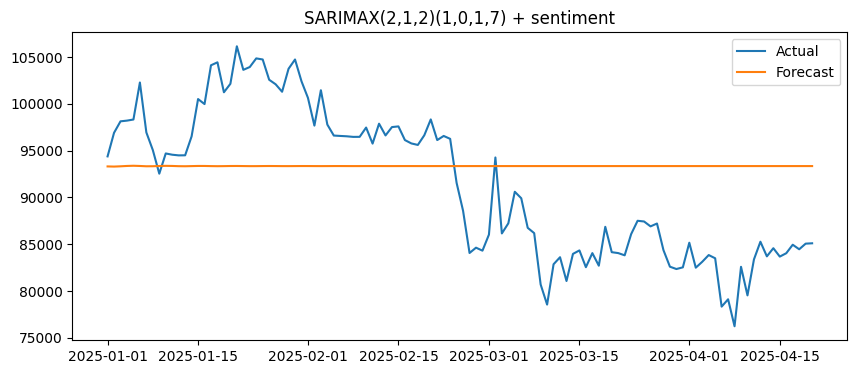

In [15]:
import pandas as pd, numpy as np, pathlib, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

PROC = pathlib.Path("../data/processed")
df   = pd.read_csv(PROC/"btc_master.csv", parse_dates=["Date"]).set_index("Date")

df["log_close"] = np.log(df["Close"])
train = df.loc[:'2024-12-31'];  test = df.loc['2025-01-01':]

exog_tr = train[["sentiment"]]
exog_te = test[["sentiment"]]

model = SARIMAX(
    train["log_close"],
    exog            = exog_tr,
    order           = (2,1,2),
    seasonal_order  = (1,0,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

pred_log = model.forecast(steps=len(test), exog=exog_te)
pred     = np.exp(pred_log)

rmse = np.sqrt(((np.exp(test["log_close"]) - pred) ** 2).mean())
print("RMSE =", round(rmse, 2))

plt.figure(figsize=(10,4))
plt.plot(test.index, np.exp(test["log_close"]), label="Actual")
plt.plot(test.index, pred,                    label="Forecast")
plt.legend(); plt.title("SARIMAX(2,1,2)(1,0,1,7) + sentiment"); plt.show()


/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


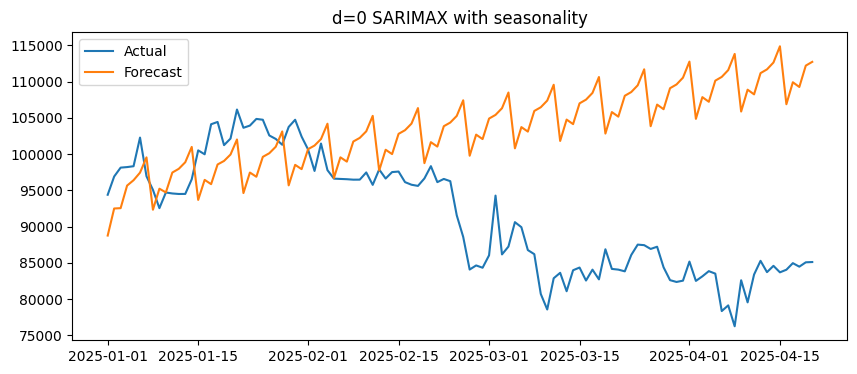

In [17]:
import pandas as pd, numpy as np, pathlib, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

PROC = pathlib.Path("../data/processed")
df   = pd.read_csv(PROC/"btc_master.csv", parse_dates=["Date"]).set_index("Date")
df["log_close"] = np.log(df["Close"])

train = df.loc[:'2024-12-31'];  test = df.loc['2025-01-01':]

m = SARIMAX(train["log_close"],
            exog=train[["sentiment"]],
            order=(3,0,3), seasonal_order=(2,0,2,7),
            enforce_stationarity=False, enforce_invertibility=False).fit()

pred_log = m.forecast(steps=len(test), exog=test[["sentiment"]])
pred_px  = np.exp(pred_log)

plt.figure(figsize=(10,4))
plt.plot(test.index, np.exp(test["log_close"]), label="Actual")
plt.plot(test.index, pred_px,                      label="Forecast")
plt.legend(); plt.title("d=0 SARIMAX with seasonality"); plt.show()


/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/aanantharajah/crypto-sentiment/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/aa

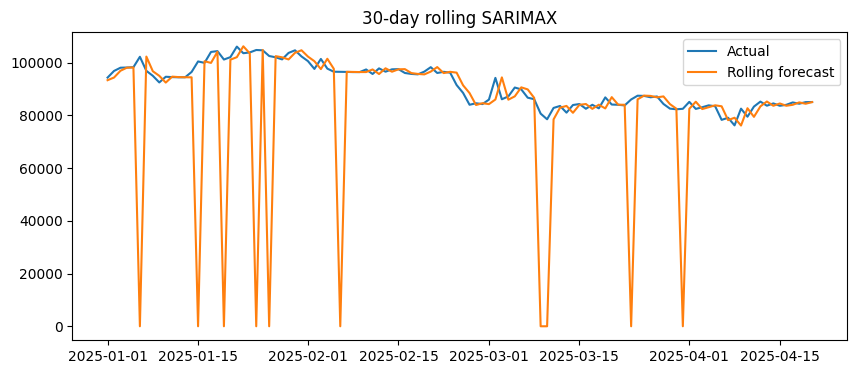

In [18]:
import pandas as pd, numpy as np, pathlib, matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
PROC = pathlib.Path("../data/processed")
df   = pd.read_csv(PROC/"btc_master.csv", parse_dates=["Date"]).set_index("Date")
df["log_close"] = np.log(df["Close"])

train_end = '2024-12-31'
test_idx  = df.loc['2025-01-01':].index

preds = []
history_y = df.loc[:train_end, "log_close"].copy()
history_x = df.loc[:train_end, ["sentiment"]].copy()

for day in test_idx:
    model = SARIMAX(history_y,
                    exog=history_x,
                    order=(2,0,2)).fit(disp=False)
    step_pred = model.forecast(steps=1, exog=df.loc[[day], ["sentiment"]])
    preds.append(step_pred.iat[0])
    # expand history window
    history_y = pd.concat([history_y, df.loc[[day], "log_close"]])
    history_x = pd.concat([history_x, df.loc[[day], ["sentiment"]]])

pred_px = np.exp(pd.Series(preds, index=test_idx))
actual  = df["Close"].loc[test_idx]

plt.figure(figsize=(10,4))
plt.plot(actual.index, actual,  label="Actual")
plt.plot(actual.index, pred_px, label="Rolling forecast")
plt.legend(); plt.title("30‑day rolling SARIMAX"); plt.show()
